In [20]:
import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [21]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
y_train.shape

(50000, 1)

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [26]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

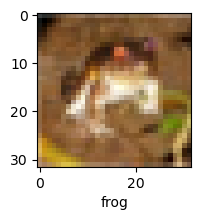

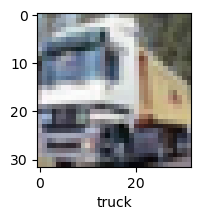

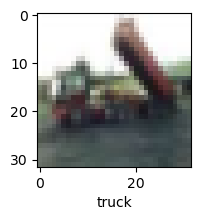

In [28]:
def pltshow(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
for i in range(3):
    pltshow(X_train,y_train,i)